## This notebook demonstrates the significant variation in average runtime throughout the dataset.
Use this notebook to help determine how many split points to use during model optimization. More runtime variation may require more split points.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import datetime
import os

from datetime import date, timedelta

plt.style.use('seaborn-v0_8-darkgrid')

## Get Eagle data

In [9]:
filepath = os.path.join('../data/', 'eagle_data.parquet')
eagle_df = pd.read_parquet(filepath)

In [10]:
eagle_df = eagle_df[eagle_df.state.isin(['COMPLETED', 'TIMEOUT'])]

## Visualize Runtime Variation (Weekly)

In [11]:
runtime_mean = eagle_df.run_time.mean() / 3600

In [12]:
avg_runtime_by_week = dict()
deviation_by_week = dict()
prev_split_time = eagle_df.submit_time[12]
split_times_weeks = list()
for n in range(1,218):
    split_time = eagle_df.submit_time[12] + timedelta(weeks=n)
    avg_runtime_by_week[n] = eagle_df[eagle_df.end_time.between(prev_split_time,split_time)].run_time.mean() / 3600
    deviation_by_week[n] = (avg_runtime_by_week[n] - runtime_mean) / runtime_mean
    prev_split_time = split_time
    if n == 1 or (n - 1) % (52/3) < 1:
        split_times_weeks.append(split_time.strftime('%Y-%m-%d'))

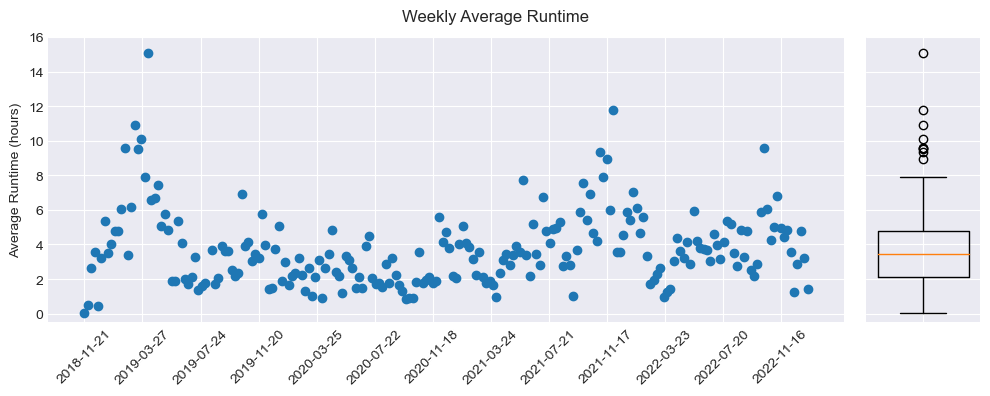

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True, width_ratios=[7,1])

ax1.scatter(list(avg_runtime_by_week.keys()),list(avg_runtime_by_week.values()))
ax1.set_xticks(ticks=np.arange(1,220,52/3),labels=split_times_weeks, rotation=45)
ax1.set_ylabel('Average Runtime (hours)')
fig.suptitle('Weekly Average Runtime')
ax2.boxplot(list(avg_runtime_by_week.values()), widths=.8)
ax2.set_xticklabels([])
ax1.set_ylim([-.5,16])
plt.tight_layout()
plt.subplots_adjust(top=.91,wspace=0.05)
plt.show()

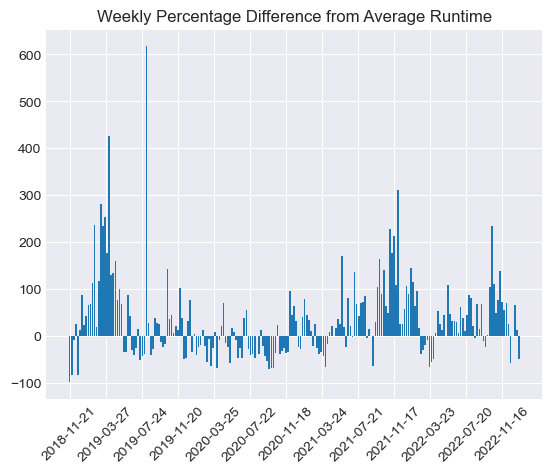

In [14]:
plt.bar(list(avg_runtime_by_week.keys()),np.array(list(deviation_by_week.values()))*100)
plt.xticks(ticks=np.arange(1,220,52/3),labels=split_times_weeks, rotation=45)
plt.title('Weekly Percentage Difference from Average Runtime')
plt.show()

## Analyze Runtime Variation (Monthly)

In [15]:
avg_runtime_by_month = dict()
split_times = list()
deviation_by_month = dict()
prev_split_time = eagle_df.submit_time[12]
for n in range(1,50):
    split_time = prev_split_time.replace(month=prev_split_time.month +1) if prev_split_time.month < 12 else prev_split_time.replace(year=prev_split_time.year+1, month=1)
    if n == 1 or (n - 1) % 4 == 0:
        split_times.append(split_time.strftime('%Y-%m'))
    avg_runtime_by_month[n] = eagle_df[eagle_df.end_time.between(prev_split_time,split_time)].run_time.mean() / 3600
    deviation_by_month[n] = (avg_runtime_by_month[n] - runtime_mean) / runtime_mean
    prev_split_time = split_time

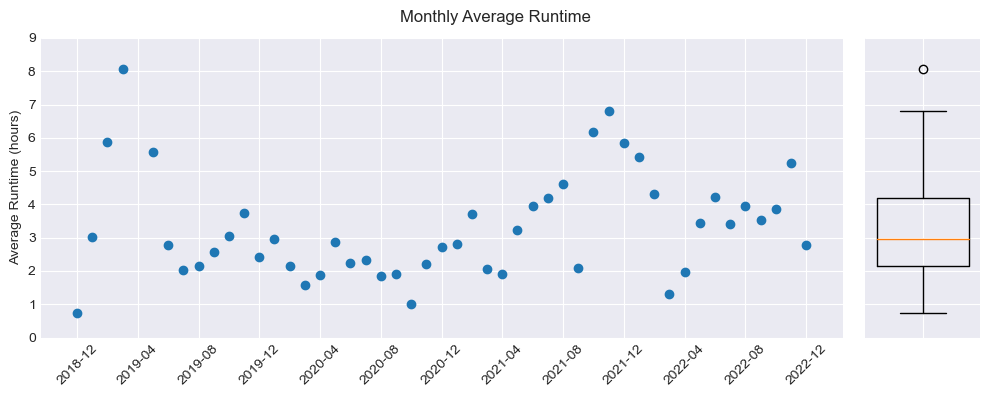

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True, width_ratios=[7,1])

ax1.scatter(list(avg_runtime_by_month.keys()),list(avg_runtime_by_month.values()))
ax1.set_xticks(ticks=range(1,52,4),labels=split_times, rotation=45)
ax1.set_ylabel('Average Runtime (hours)')
fig.suptitle('Monthly Average Runtime')
ax1.set_ylim([0,9])
ax2.boxplot(list(avg_runtime_by_month.values()), widths=.8)
ax2.set_xticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.91, wspace=0.05)
plt.show()

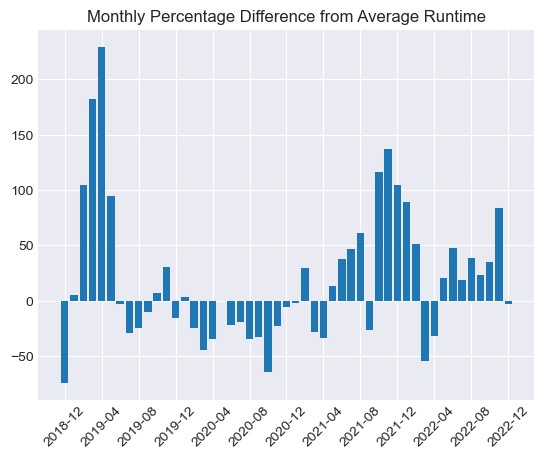

In [17]:
plt.bar(list(deviation_by_month.keys()),np.array(list(deviation_by_month.values()))*100)
plt.xticks(ticks=range(1,52,4),labels=split_times, rotation=45)
plt.title('Monthly Percentage Difference from Average Runtime')
plt.show()